<a href="https://colab.research.google.com/github/janchorowski/dl_uwr/blob/summer2020/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

**Submission deadline: last lab session before or on Thursday, 26.03.2020**

**Points: 6 + 1 bonus points**

## Submission instructions
The class is held remotely. To sumbmit your solutions please save the notebook to your Google Drive, then:
1. Rename it it to: Assignment2_Surname_FirstName
2. Rerun the whole notebook `Runtime -> Restar and run all`
3. Make a pinned revision `File->Save and pin revision`
4. Share the notebook with your instructor using his `cs.uni.wroc.pl` email

We will use the commenting system and video conferences to check and discuss the solutions.

As always, please submit corrections using GitHub's Pull Requests.

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D` matrix.

Text(0, 0.5, 'X[1]')

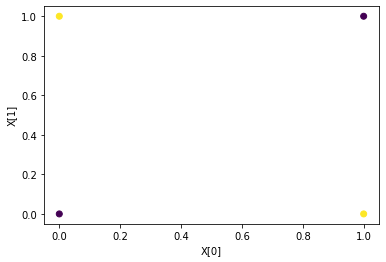

In [2]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1],
    ], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array(
    [[0],
     [1],
     [1],
     [0],
    ], dtype=np.float32)

plt.scatter(X[:,0], X[:,1], c=Y[:,0], )
plt.xlabel('X[0]')
plt.ylabel('X[1]')

# Problem 1 [2p]

Fill in the details of a forward pass, then manually set the weights and biases in the network to solve the 2D XOR task defined above.

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


def ReLU(x):
    return x * (x > 0)


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32, activation='sigmoid'):
        self.W1 = np.zeros((in_features, num_hidden), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_hidden, 1), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.activation = activation
        self.init_params()

    def init_params(self):
        # TODO Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        mu, std = 0, 0.5
        self.W1 = np.random.normal(mu, std, size=(self.W1.shape)) # m x hidden
        self.W2 = np.random.normal(mu, std, size=(self.W2.shape)) # hidden x 1
        self.b1 = np.random.normal(mu, std, size=(self.b1.shape))
        self.b2 = np.random.normal(mu, std, size=(self.b2.shape))
        
        if self.activation == 'sigmoid':
            self.activation_f = sigmoid
        elif self.activation == 'relu':
            self.activation_f = ReLU
        else:
            print('NO VALID ACTIVATION FUNCTION!')

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1) + self.b1 # n x num_hidden
    
        # Outputs after the sigmoid non-linearity
        O1 = self.activation_f(A1) # n x num_hidden
     
        # Inputs to neuron in the second layer
        A2 = np.dot(O1, self.W2) + self.b2 # n x 1
        
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2).reshape(1, -1) # 1 x n

#         https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits
        if Y is not None:
            Y = Y.reshape(1, -1)
            A2 = A2.reshape(1, -1)
            loss = None
     
            loss = A2 * (A2 > 0) - A2 * Y + np.log(1 + np.exp(-np.abs(A2)))
            # loss =  Y * -np.log(O2) + (1 - Y) * -np.log(1 - O2)
   
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2: fill in the gradient computation
            # Please note, thate there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reversed order. 

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient 
            # of logistic sigmoid and cross-entropy loss 
            
            n, m = X.shape
            A2_grad = (O2 - Y) # 1 x n
            self.b2_grad = A2_grad.sum(axis=1) / n
            self.W2_grad = A2_grad.dot(O1).T / n # ((1 x n) x (n x h)).T = (1 x h).T
            
            O1_grad = A2_grad.T.dot(self.W2.T) # (n x 1) x (1 x h) = n x h
            if self.activation == 'sigmoid':
              A1_grad = O1_grad * O1 * (np.ones(O1.shape) - O1) # n x h
            elif self.activation == 'relu':
              A1_grad = O1_grad * (1 * (A1 > 0))
            else:
              raise NotImplementedError("No activation function!")
              
            self.b1_grad = A1_grad.sum(axis=0) / n # 1 x h
            self.W1_grad = X.T.dot(A1_grad) / n # (m x n) x (n x h) = m x h

        return O2, loss

In [4]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
mu, std = 0, 0.5
net.W1 = np.random.normal(mu, std, size=(net.W1.shape)) # m x hidden
net.W2 = np.random.normal(mu, std, size=(net.W2.shape)) # hidden x 1
net.b1 = np.random.normal(mu, std, size=(net.b1.shape))
net.b2 = np.random.normal(mu, std)

# Hint: since we use the logistic sigmoid activation, the weights may need to 
# be fairly large 


print(net.forward(X, Y, do_backward=True))

(array([[0.30915216, 0.30920928, 0.30895626, 0.30899306]]), 0.7719334065475385)


# Problem 2 [2p]

1. Fill in the backward pass.
2. Implement random initialization of network parameters.
3. Using `float64` verify correctness of your backward pass.

In [0]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""
    
    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + '_grad')
    assert (param.shape == orig_grad.shape)

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
        
    assert np.allclose(grad, orig_grad)
    
    return grad, orig_grad

In [6]:
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ['W1', 'b1', 'W2', 'b2']:
    print(param_name)
    grad, orig_grad = (check_grad(net, param_name, X, Y))
    print(grad, end='\n')
    print(orig_grad, end='\n\n')

W1
[[-0.00134521  0.00109268]
 [-0.00152275  0.00052375]]
[[-0.00134521  0.00109268]
 [-0.00152275  0.00052375]]

b1
[-0.0027494  -0.00124169]
[-0.0027494  -0.00124169]

W2
[[0.03449373]
 [0.02891793]]
[[0.03449373]
 [0.02891793]]

b2
[0.07175832]
[0.07175832]



# Problem 3 [2p]

Fill in the details of batch gradient descent below, then train a network to solve 2D XOR problem.

Then test the reliability of solving the 3D XOR task.

In [7]:
net = SmallNet(2, 10, dtype=np.float64)

iters = 100000
alpha = 0.1

for i in range(iters):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f'iter: {i}, L: {loss}')
    for param_name in ['W1', 'b1', 'W2', 'b2']:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        grad = getattr(net, param_name + '_grad')
#         print(param_name)
#         print(param[:])
        param[:] = param[:] - alpha * grad
#         print(param[:])

iter: 0, L: 0.7315883553393977
iter: 5000, L: 0.04585817825769073
iter: 10000, L: 0.011299486444767717
iter: 15000, L: 0.005884953887198481
iter: 20000, L: 0.0038395713280795114
iter: 25000, L: 0.0027969989964917665
iter: 30000, L: 0.002175887621136767
iter: 35000, L: 0.0017681437706196256
iter: 40000, L: 0.001482033857359618
iter: 45000, L: 0.0012712712599133769
iter: 50000, L: 0.001110152487025914
iter: 55000, L: 0.0009833394268113158
iter: 60000, L: 0.0008811504470206798
iter: 65000, L: 0.0007971921223902613
iter: 70000, L: 0.0007270828429775441
iter: 75000, L: 0.0006677250676478193
iter: 80000, L: 0.0006168705226811226
iter: 85000, L: 0.0005728499488373935
iter: 90000, L: 0.000534399337014939
iter: 95000, L: 0.0005005448743118196


In [8]:
preds, loss = net.forward(X, Y, do_backward=True)
preds

array([[2.04857648e-04, 9.99477671e-01, 9.99555697e-01, 7.10101616e-04]])

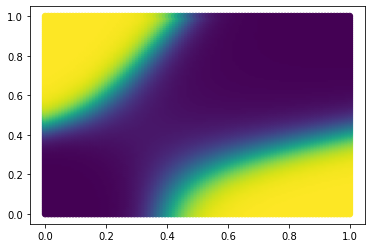

In [9]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

xv, yv = np.meshgrid(x, y)
xv = xv.reshape(1, -1)
yv = yv.reshape(1, -1)

cords = np.r_[xv, yv].T
preds = net.forward(cords)[0]

plt.scatter(xv, yv, c=preds)

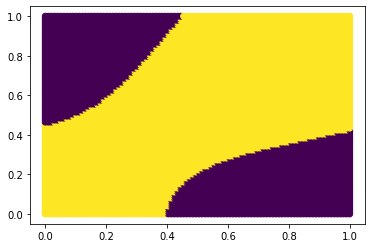

In [10]:
plt.scatter(xv, yv, c=preds < 0.5)

Generate below data for a 3D XOR task. Try a few values of hidden layer size. Plot the reliability of training, i.e. how many trainings succeed for a given hiden layer size.

What is easier to train: a smaller, or large network?

In [0]:
x, y = [], []

for i in range(8):
    num = bin(i)[2:]
    num = '0' *(3 - len(num)) + num
    x.append(list(map(int, num)))
#     y.append()

x = np.array(x)
y = x.sum(axis=1) % 2

In [12]:
X3 = x
Y3 = y

iters = 100000
alpha = 0.1
    
for hidden_dim in [2, 3, 5, 10, 20]:
    print(f'Hidden: {hidden_dim}')
    net = SmallNet(in_features=3, num_hidden=hidden_dim, dtype=np.float64)
    net.init_params()
    for i in range(iters):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if (i % 10000) == 0:
            print(f'iter: {i}, L: {loss}')
        for param_name in ['W1', 'b1', 'W2', 'b2']:
            param = getattr(net, param_name)
            grad = getattr(net, param_name + '_grad')
            param[:] = param[:] - alpha * grad

Hidden: 2
iter: 0, L: 0.7124114325501267
iter: 10000, L: 0.6931530009157977
iter: 20000, L: 0.6931316648708726
iter: 30000, L: 0.6930635649293648
iter: 40000, L: 0.6890256060876765
iter: 50000, L: 0.2662278647369004
iter: 60000, L: 0.11191455194211222
iter: 70000, L: 0.06800298386241652
iter: 80000, L: 0.04829236701272814
iter: 90000, L: 0.03727606222841459
Hidden: 3
iter: 0, L: 0.8071679367337989
iter: 10000, L: 0.6929665789990853
iter: 20000, L: 0.07734042548713654
iter: 30000, L: 0.01142397898763654
iter: 40000, L: 0.00606781057249863
iter: 50000, L: 0.0041258214636991156
iter: 60000, L: 0.003124660830034203
iter: 70000, L: 0.0025143177489078874
iter: 80000, L: 0.0021034170799312532
iter: 90000, L: 0.0018079601398213819
Hidden: 5
iter: 0, L: 0.7551331872702596
iter: 10000, L: 0.6919592962251488
iter: 20000, L: 0.025681173100444488
iter: 30000, L: 0.006914771085450641
iter: 40000, L: 0.003756997893974781
iter: 50000, L: 0.002508051984311294
iter: 60000, L: 0.0018502850083790576
iter:

# Problem 4 [1bp]

Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Verify ho

In [16]:
net = SmallNet(2, 10, dtype=np.float64, activation='relu')


iters = 100000
alpha = 0.1

for i in range(iters):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f'iter: {i}, L: {loss}')
    for param_name in ['W1', 'b1', 'W2', 'b2']:
        param = getattr(net, param_name)
        grad = getattr(net, param_name + '_grad')
        param[:] = param[:] - alpha * grad

iter: 0, L: 0.7088198525859675
iter: 5000, L: 0.0012969189732616984
iter: 10000, L: 0.0005449518661619868
iter: 15000, L: 0.0003334411884558107
iter: 20000, L: 0.00023661618717388749
iter: 25000, L: 0.00018181256140127936
iter: 30000, L: 0.00014681782012288672
iter: 35000, L: 0.00012266133037007137
iter: 40000, L: 0.00010504657150534339
iter: 45000, L: 9.166246851653464e-05
iter: 50000, L: 8.117210619106675e-05
iter: 55000, L: 7.274103359030736e-05
iter: 60000, L: 6.582435695805532e-05
iter: 65000, L: 6.005606821957936e-05
iter: 70000, L: 5.5176884396455946e-05
iter: 75000, L: 5.099828317429086e-05
iter: 80000, L: 4.738141226840663e-05
iter: 85000, L: 4.4221308795279246e-05
iter: 90000, L: 4.143898049586274e-05
iter: 95000, L: 3.897068775452338e-05


In [17]:
preds, loss = net.forward(X, Y, do_backward=True)
preds

array([[3.54270461e-05, 9.99962632e-01, 9.99958547e-01, 3.28183278e-05]])

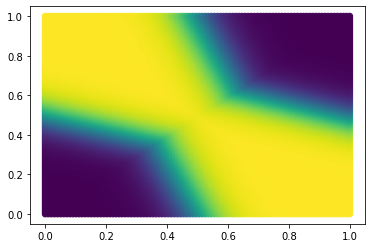

In [18]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

xv, yv = np.meshgrid(x, y)
xv = xv.reshape(1, -1)
yv = yv.reshape(1, -1)

cords = np.r_[xv, yv].T
preds = net.forward(cords)[0]

plt.scatter(xv, yv, c=preds)